In [73]:
import pandas as pd

df = pd.read_csv('speakers.csv')
print(df.head())

   identifier                        birth_place native_language  \
0  afrikaans1             virginia, south africa       afrikaans   
1  afrikaans2             pretoria, south africa       afrikaans   
2  afrikaans3  pretoria, transvaal, south africa       afrikaans   
3  afrikaans4             pretoria, south africa       afrikaans   
4  afrikaans5            cape town, south africa       afrikaans   

          other_languages   age     sex  age_of_english_onset  \
0                  tswana  27.0  female                   9.0   
1     dutch german french  40.0    male                   5.0   
2  gujarati sindhi french  43.0    male                   4.0   
3           flemish dutch  26.0    male                   8.0   
4                    none  19.0    male                   6.0   

  english_learning_method english_residence length_of_english_residence  \
0                academic               usa                   0.5 years   
1                academic               usa       

In [74]:
import mutagen.mp3
directory = 'mp3s'
#just the mp3_name
temp_df = df['mp3_name']

length = []

for mp3 in temp_df:
    audio = mutagen.mp3.MP3(directory + '/' + mp3)
    length.append(audio.info.length)




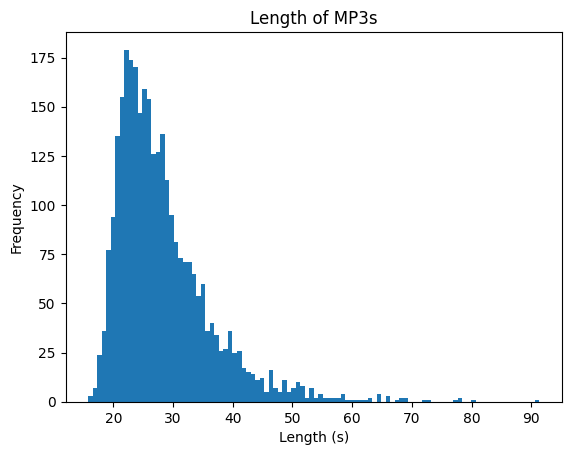

Mean length: 28.36518369653683
Standard deviation: 8.123889886541065


In [75]:
import numpy as np
#print spread of lengths
import matplotlib.pyplot as plt
plt.hist(length, bins=100)
plt.title('Length of MP3s')
plt.xlabel('Length (s)')
plt.ylabel('Frequency')
plt.show()
mean_length = np.mean(length)
std_length = np.std(length)

print("Mean length:", mean_length)
print("Standard deviation:", std_length)



In [76]:
from WER_finder import WERCalculator
SNR = "mp3s" #values are "mp3s", "40_SNR", "30_SNR", "20_SNR", "10_SNR", "0_SNR", "-10_SNR".
folder_path = "base_model_transcription "+SNR
wer_calculator = WERCalculator(folder_path)
werdf=wer_calculator.calculate_wer()
print(werdf)


                 file_name       wer  transcription_length
0          arabic3.mp3.txt  0.130435                    70
1     portuguese23.mp3.txt  0.086957                    68
2         french30.mp3.txt  0.014493                    68
3        arabic138.mp3.txt  0.101449                    71
4        arabic128.mp3.txt  0.130435                    67
...                    ...       ...                   ...
3027  indonesian13.mp3.txt  0.043478                    68
3028    spanish241.mp3.txt  0.333333                    77
3029    english502.mp3.txt  0.043478                    69
3030        farsi5.mp3.txt  0.144928                    72
3031     spanish70.mp3.txt  0.159420                    71

[3032 rows x 3 columns]


Mean WER: 0.09155155183872926


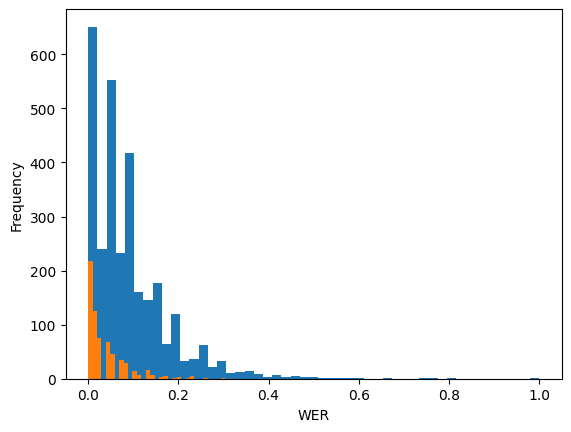

In [80]:

#pop werdf item no 1679
# werdf = werdf.drop([1679])


wer= werdf['wer']
plt.hist(wer, bins=49)

plt.xlabel('WER')
plt.ylabel('Frequency')

#get the index of english449
index = werdf[werdf['file_name'] == 'english449.mp3'].index.values
item = werdf.iloc[index]
mean = np.mean(wer)
print("Mean WER:", mean)
# plot just for files starting with 'english' on the same plot but in a differenc color

english = werdf[werdf['file_name'].str.startswith('english')]
were= english['wer']
plt.hist(were, bins=31)
plt.show()




In [81]:


#find the index of the highest WER

index = wer.idxmax()
item = werdf.loc[index]
print(item)
werdf = werdf.drop([index])


file_name               home sign1.mp3.txt
wer                                    1.0
transcription_length                     9
Name: 1181, dtype: object


In [72]:
ENGLISH449 = " Please call Stella, ask her to bring these things with her from the store. Six spoons of fresh snow peas, five six slabs of blue cheese, and maybe a snack for her brother Bob. We also need a small plastic snake and a big toy frog for the kids. She can scoop these things into three red bags, and we will go meet her Wednesday at the train station."
base =       "Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station."
#number of words in base
base_words = base.split()
print("Number of words in base:", len(base_words))
index = werdf[werdf['file_name'] == "english449.mp3.txt"].index
item = werdf.loc[index]
print(item)
#observed WER = 0.202899



Number of words in base: 69
              file_name       wer  transcription_length
309  english449.mp3.txt  0.014493                    69


WER as I see it is 1/69 or 0.015


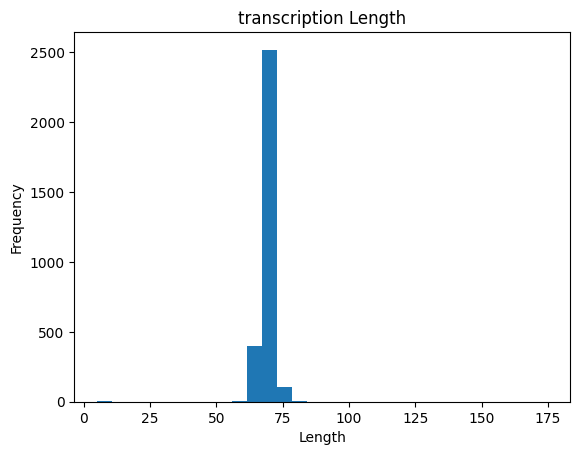

In [70]:
transcription_lengths = werdf['transcription_length']
plt.hist(transcription_lengths,30 )
plt.title('transcription Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


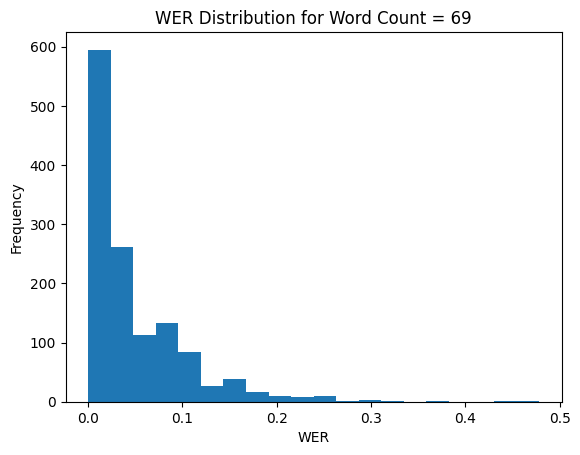

               file_name       wer  transcription_length
7       arabic54.mp3.txt  0.000000                    69
8     english603.mp3.txt  0.014493                    69
10       hebrew2.mp3.txt  0.057971                    69
13     amharic17.mp3.txt  0.115942                    69
17    spanish226.mp3.txt  0.014493                    69
...                  ...       ...                   ...
3018  english347.mp3.txt  0.000000                    69
3021  english357.mp3.txt  0.057971                    69
3025  english512.mp3.txt  0.028986                    69
3026   spanish60.mp3.txt  0.086957                    69
3029  english502.mp3.txt  0.043478                    69

[1301 rows x 3 columns]


In [64]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only rows with word count equal to 69
filtered_df = werdf[werdf['transcription_length'] == 69]

# Plot the filtered dataframe
plt.hist(filtered_df['wer'], bins=20)
plt.xlabel('WER')
plt.ylabel('Frequency')
plt.title('WER Distribution for Word Count = 69')
plt.show()
#1301 entries. 69 words in the transcription
print(filtered_df)


In [ ]:

wer= werdf['wer']
plt.hist(wer, bins=49)

plt.xlabel('WER')
plt.ylabel('Frequency')

#get the index of english449
index = werdf[werdf['file_name'] == 'english449.mp3'].index.values
item = werdf.iloc[index]
mean = np.mean(wer)
print("Mean WER:", mean)
# plot just for files starting with 'english' on the same plot but in a differenc color

english = werdf[werdf['file_name'].str.startswith('english')]
were= english['wer']
plt.hist(were, bins=31)
plt.show()
